In [27]:
import warnings
warnings.filterwarnings("ignore")


In [1]:
# Install required packages (Colab may already have many; running ensures correct versions)
!pip install -q qiskit qiskit-machine-learning qiskit-aer
!pip install -q numpy pandas matplotlib seaborn scikit-learn pillow joblib


In [2]:
import sys, qiskit, numpy, sklearn, pandas
import qiskit_aer

print("Python:", sys.version.split()[0])
print("Qiskit:", qiskit.__version__)
print("Qiskit-Aer:", qiskit_aer.__version__)
print("NumPy:", numpy.__version__)
print("scikit-learn:", sklearn.__version__)
print("Pandas:", pandas.__version__)


Python: 3.12.12
Qiskit: 1.0.2
Qiskit-Aer: 0.14.1
NumPy: 1.26.4
scikit-learn: 1.6.1
Pandas: 2.2.2


In [4]:
import os

base = "/content/quantum_project"
paths = [
    base+"/qml_md/data", base+"/qml_md/notebooks", base+"/qml_md/results", base+"/qml_md/src",
    base+"/qip/images", base+"/qip/notebooks", base+"/qip/results", base+"/qip/src",
    base+"/report"
]
for p in paths:
    os.makedirs(p, exist_ok=True)

print("Top-level folders in /content/quantum_project:")
print(sorted(os.listdir(base)))

print("\nqml_md contents:", sorted(os.listdir(base+"/qml_md")))
print("qip contents:", sorted(os.listdir(base+"/qip")))


Top-level folders in /content/quantum_project:
['qip', 'qml_md', 'report']

qml_md contents: ['data', 'notebooks', 'results', 'src']
qip contents: ['images', 'notebooks', 'results', 'src']


In [5]:
test_path = "/content/quantum_project/qml_md/results/INIT_SUCCESS.txt"
with open(test_path, "w") as f:
    f.write("Init OK\n")

import os
print("Wrote test file:", test_path)
print("File exists:", os.path.exists(test_path))


Wrote test file: /content/quantum_project/qml_md/results/INIT_SUCCESS.txt
File exists: True


In [16]:
!wget -O wdbc.data https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data


--2025-11-23 10:35:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wdbc.data’

wdbc.data               [  <=>               ] 121.19K   314KB/s    in 0.4s    

2025-11-23 10:35:05 (314 KB/s) - ‘wdbc.data’ saved [124103]



In [6]:
import pandas as pd

# The dataset does NOT include headers
column_names = [
    "ID",
    "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

df = pd.read_csv("wdbc.data", header=None, names=column_names)
df.head()


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Convert Diagnosis from M/B to 1/0
df['target'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Drop ID and Diagnosis (not useful for ML)
df = df.drop(columns=['ID', 'Diagnosis'])

df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [8]:
save_path = "/content/quantum_project/qml_md/data/breast_cancer.csv"
df.to_csv(save_path, index=False)
print("Saved cleaned dataset to:", save_path)
print("Shape:", df.shape)


Saved cleaned dataset to: /content/quantum_project/qml_md/data/breast_cancer.csv
Shape: (569, 31)


In [9]:
import pandas as pd
import numpy as np
from pathlib import Path

csv_path = "/content/quantum_project/qml_md/data/breast_cancer.csv"
df = pd.read_csv(csv_path)
print("Loaded:", csv_path)
print("Shape:", df.shape)
print("Columns:", list(df.columns))
display(df.head())
# Separate X, y
X = df.drop(columns=['target']).values
y = df['target'].values


Loaded: /content/quantum_project/qml_md/data/breast_cancer.csv
Shape: (569, 31)
Columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'target']


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import joblib, os

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA -> 4 components
pca = PCA(n_components=4, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("X_pca shape:", X_pca.shape)
print("Explained variance ratio (4 comps):", np.round(pca.explained_variance_ratio_, 4))
print("Total explained variance (4 comps):", np.round(np.sum(pca.explained_variance_ratio_), 4))

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.30, stratify=y, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Save scaler and pca for reproducibility
os.makedirs("/content/quantum_project/qml_md/results", exist_ok=True)
joblib.dump(scaler, "/content/quantum_project/qml_md/results/scaler.pkl")
joblib.dump(pca, "/content/quantum_project/qml_md/results/pca.pkl")
print("Saved scaler and PCA to qml_md/results/")


X_pca shape: (569, 4)
Explained variance ratio (4 comps): [0.4427 0.1897 0.0939 0.066 ]
Total explained variance (4 comps): 0.7924
Train shape: (398, 4) Test shape: (171, 4)
Saved scaler and PCA to qml_md/results/


In [11]:
# Fixed imports for Colab / current Qiskit
from qiskit.circuit.library import ZZFeatureMap
from qiskit import transpile
from qiskit_aer import AerSimulator   # <- use AerSimulator from qiskit_aer
import numpy as np
from sklearn.svm import SVC
import time

# Backend: statevector simulator
sv_backend = AerSimulator(method="statevector")
print("Using backend:", type(sv_backend).__name__)


Using backend: AerSimulator


In [13]:
feature_dim = 4
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1)
print(feature_map)


     ┌────────────────────────────────────┐
q_0: ┤0                                   ├
     │                                    │
q_1: ┤1                                   ├
     │  ZZFeatureMap(x[0],x[1],x[2],x[3]) │
q_2: ┤2                                   ├
     │                                    │
q_3: ┤3                                   ├
     └────────────────────────────────────┘


In [14]:
def get_statevector(x):
    """
    Encode sample x (length=4) using the feature_map and return its statevector (numpy array).
    """
    qc = feature_map.bind_parameters(x)
    compiled = transpile(qc, sv_backend)
    job = sv_backend.run(compiled)
    result = job.result()
    sv = result.get_statevector(compiled)
    return np.array(sv)


In [15]:
# Robust get_statevector() that works across Qiskit versions
from qiskit import transpile
import numpy as np

def get_statevector(x):
    """
    Encode a single sample x (length=feature_dim) using the feature_map and return its statevector (numpy array).
    Tries multiple safe binding methods to handle Qiskit API differences.
    """
    # ensure x is 1D array of floats
    x = np.asarray(x).astype(float).flatten()

    # map parameters -> values
    params = list(feature_map.parameters)
    if len(params) != len(x):
        raise ValueError(f"Feature map expects {len(params)} parameters but got input length {len(x)}.")

    param_dict = {p: float(x[i]) for i, p in enumerate(params)}

    # Try binding using different available methods
    try:
        # modern Qiskit: bind_parameters exists and accepts a dict
        bound_qc = feature_map.bind_parameters(param_dict)
    except AttributeError:
        try:
            # older/newer variants: assign_parameters may exist
            bound_qc = feature_map.assign_parameters(param_dict)
        except AttributeError:
            # last resort: use parameter substitution via QuantumCircuit.compose (rare)
            raise RuntimeError("Cannot bind parameters: neither bind_parameters nor assign_parameters is available on the feature_map object. "
                               "Please paste `print(dir(feature_map))` here so I can inspect available methods in your environment.")

    # compile & run on statevector backend
    compiled = transpile(bound_qc, sv_backend)
    job = sv_backend.run(compiled)
    result = job.result()
    sv = result.get_statevector(compiled)
    return np.array(sv)


In [16]:
print("feature_map type:", type(feature_map))
print("feature_map.parameters:", feature_map.parameters)
print("dir(feature_map):", [m for m in dir(feature_map) if not m.startswith('_')])


feature_map type: <class 'qiskit.circuit.library.data_preparation.zz_feature_map.ZZFeatureMap'>
feature_map.parameters: ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])])
dir(feature_map): ['add_bits', 'add_calibration', 'add_layer', 'add_register', 'alpha', 'ancillas', 'append', 'assign_parameters', 'barrier', 'break_loop', 'calibrations', 'cast', 'cbit_argument_conversion', 'ccx', 'ccz', 'ch', 'clbits', 'clear', 'cls_instances', 'cls_prefix', 'compose', 'continue_loop', 'control', 'copy', 'copy_empty_like', 'count_ops', 'cp', 'cregs', 'crx', 'cry', 'crz', 'cs', 'csdg', 'cswap', 'csx', 'cu', 'cx', 'cy', 'cz', 'data', 'dcx', 'decompose', 'delay', 'depth', 'draw', 'duration', 'ecr', 'entanglement', 'entanglement_blocks', 'feature_dimension', 'find_bit', 'flatten', 'for_loop', 'from_instructions', 'from_qasm_file', 'from_qasm_str', 'get_entangler_map', 'get_instructions', 'get_parameter', 'get_unentangle

In [21]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split

# Paths
data_path = "/content/quantum_project/qml_md/data/breast_cancer.csv"
scaler_path = "/content/quantum_project/qml_md/results/scaler.pkl"
pca_path = "/content/quantum_project/qml_md/results/pca.pkl"

# Load dataset
df = pd.read_csv(data_path)

# Load scaler and PCA
scaler = joblib.load(scaler_path)
pca = joblib.load(pca_path)

# Prepare X and y
X = df.drop(columns=['target']).values
y = df['target'].values

# Scale
X_scaled = scaler.transform(X)

# PCA to 4 features
X_pca = pca.transform(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.30, stratify=y, random_state=42
)

print("Reload complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Reload complete.
X_train shape: (398, 4)
X_test shape: (171, 4)


In [20]:
rom sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
import os

models = {
    'SVM_rbf': SVC(kernel='rbf', probability=True, random_state=42),
    'LogReg': LogisticRegression(max_iter=2000, random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)

    results.append([name, acc, f1, prec, rec])
    print(f"{name} — acc: {acc:.4f}, f1: {f1:.4f}, precision: {prec:.4f}, recall: {rec:.4f}")

# Save results
out_path = "/content/quantum_project/qml_md/results/classical_baselines.csv"
os.makedirs("/content/quantum_project/qml_md/results", exist_ok=True)
pd.DataFrame(results, columns=['model','accuracy','f1','precision','recall']).to_csv(out_path, index=False)

print("\nSaved classical baselines to:", out_path)


SVM_rbf — acc: 0.9591, f1: 0.9421, precision: 1.0000, recall: 0.8906
LogReg — acc: 0.9708, f1: 0.9593, precision: 1.0000, recall: 0.9219
MLP — acc: 0.9474, f1: 0.9256, precision: 0.9825, recall: 0.8750

Saved classical baselines to: /content/quantum_project/qml_md/results/classical_baselines.csv


In [25]:
# ===== Fixed QSVM (save_statevector + robust extraction) =====
import numpy as np, time, os, pandas as pd
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

os.makedirs("/content/quantum_project/qml_md/results", exist_ok=True)
backend = AerSimulator(method="statevector")
print("Using backend:", type(backend).__name__)

# simple feature map (angle encoding) -- make sure it saves the statevector
def feature_map_save(x):
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(float(x[i]), i)
    qc.save_statevector(label="statevector")   # <--- important
    return qc

def extract_statevector_from_result(result):
    """Robust extraction of statevector from result object."""
    # 1) try result.data(0)
    try:
        d0 = result.data(0)
        if isinstance(d0, dict) and 'statevector' in d0:
            return np.array(d0['statevector'])
    except Exception:
        pass

    # 2) try result.get_statevector() (some builds)
    try:
        sv = result.get_statevector()
        return np.array(sv)
    except Exception:
        pass

    # 3) inspect to_dict
    try:
        rd = result.to_dict()
        if isinstance(rd, dict) and 'results' in rd and len(rd['results'])>0:
            res0 = rd['results'][0]
            # sometimes stored under res0['data']['statevector']
            if 'data' in res0 and isinstance(res0['data'], dict):
                for k in ['statevector','sv','state','statevector_0']:
                    if k in res0['data']:
                        return np.array(res0['data'][k])
    except Exception:
        pass

    # fail if not found
    raise RuntimeError("Statevector not found in simulator result (checked data(0), get_statevector(), to_dict()).")

def get_statevector(x):
    qc = feature_map_save(x)
    compiled = transpile(qc, backend, optimization_level=0)
    job = backend.run(compiled)
    result = job.result()
    sv = extract_statevector_from_result(result)
    return np.asarray(sv)

def quantum_kernel(A, B, verbose=False):
    A_sv = [get_statevector(a) for a in A]
    B_sv = [get_statevector(b) for b in B]

    K = np.zeros((len(A_sv), len(B_sv)))
    for i, sv1 in enumerate(A_sv):
        for j, sv2 in enumerate(B_sv):
            K[i, j] = np.abs(np.vdot(sv1, sv2))**2
        if verbose and (i+1) % 50 == 0:
            print("Computed", i+1, "of", len(A_sv), "rows")
    return K

# --- QUICK TEST (recommended) ---
# To avoid a long full-kernel run while verifying, test with a small subset first:
test_subset = 40   # change to 40 or 80 to test quickly

print("Testing kernel on a small subset first (size = {})...".format(test_subset))
K_test_small = quantum_kernel(X_train[:test_subset], X_train[:test_subset], verbose=True)
print("Small kernel shape:", K_test_small.shape)

# If the small test is fine, compute full kernels:
print("Computing full kernels now (this may take time)...")
t0 = time.time()
K_train = quantum_kernel(X_train, X_train)
K_test  = quantum_kernel(X_test, X_train)
t1 = time.time()
print("Full kernel shapes: K_train {}, K_test {}".format(K_train.shape, K_test.shape))
print("Kernel computation time (s):", round(t1 - t0, 2))

# Train SVM with precomputed kernel
clf = SVC(kernel="precomputed")
clf.fit(K_train, y_train)
y_pred = clf.predict(K_test)

acc  = accuracy_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)

print("QSVM Accuracy:", acc)
print("QSVM F1:", f1)
print("QSVM Precision:", prec)
print("QSVM Recall:", rec)

# Save results
out_path = "/content/quantum_project/qml_md/results/qsvm_fixed_results.csv"
pd.DataFrame([["QSVM", acc, f1, prec, rec]],
             columns=['model','accuracy','f1','precision','recall']).to_csv(out_path, index=False)
print("Saved QSVM results to:", out_path)


Using backend: AerSimulator
Testing kernel on a small subset first (size = 40)...
Small kernel shape: (40, 40)
Computing full kernels now (this may take time)...
Full kernel shapes: K_train (398, 398), K_test (171, 398)
Kernel computation time (s): 16.18
QSVM Accuracy: 0.7134502923976608
QSVM F1: 0.4948453608247423
QSVM Precision: 0.7272727272727273
QSVM Recall: 0.375
Saved QSVM results to: /content/quantum_project/qml_md/results/qsvm_fixed_results.csv


In [27]:
# --- FIXED VQC: Works on all Qiskit versions (assign_parameters only) ---

import numpy as np, time, os, json
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# --- Settings ---
n_qubits = 4
layers = 1
train_subset = 80
max_iter = 30

checkpoint_path = "/content/quantum_project/qml_md/results/vqc_checkpoint.json"
results_csv = "/content/quantum_project/qml_md/results/vqc_results.csv"
os.makedirs("/content/quantum_project/qml_md/results", exist_ok=True)

# --- Backend ---
sv_backend = AerSimulator(method="statevector")
print("Backend:", type(sv_backend).__name__)

# --- Load PCA data (reload if needed) ---
try:
    X_train.shape
except:
    import joblib
    df = pd.read_csv("/content/quantum_project/qml_md/data/breast_cancer.csv")
    scaler = joblib.load("/content/quantum_project/qml_md/results/scaler.pkl")
    pca    = joblib.load("/content/quantum_project/qml_md/results/pca.pkl")
    X = scaler.transform(df.drop(columns=['target']).values)
    X_pca = pca.transform(X)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, df['target'].values, test_size=0.30, stratify=df['target'].values, random_state=42)

# small training subset
rng = np.random.RandomState(42)
idx = rng.choice(len(X_train), size=min(train_subset, len(X_train)), replace=False)
X_tr = X_train[idx]
y_tr = y_train[idx]

# ------- Build parameterized circuit -------
feat_params = [Parameter(f"f{i}") for i in range(n_qubits)]
n_params = layers*(2*n_qubits)
ansatz_params = [Parameter(f"a{i}") for i in range(n_params)]

qc = QuantumCircuit(n_qubits)

# Feature encoding
for i in range(n_qubits):
    qc.ry(feat_params[i], i)

# Ansatz
t = 0
for _ in range(layers):
    for q in range(n_qubits):
        qc.ry(ansatz_params[t], q); t += 1
    for q in range(n_qubits-1):
        qc.cz(q, q+1)
    for q in range(n_qubits):
        qc.rz(ansatz_params[t], q); t += 1

qc.save_statevector("statevector")

# transpile ONCE (no parameters!)
trans_qc = transpile(qc, sv_backend, optimization_level=0)

print("Circuit built. Total parameters:", len(ansatz_params))

# ------- Prediction using assign_parameters -------
def predict_prob(x, theta):
    bind = {}
    for i,p in enumerate(feat_params): bind[p] = float(x[i])
    for i,p in enumerate(ansatz_params): bind[p] = float(theta[i])

    bound = trans_qc.assign_parameters(bind)
    res = sv_backend.run(bound).result()

    try:
        sv = res.data(0)['statevector']
    except:
        sv = res.get_statevector()

    sv = np.array(sv)
    prob1 = np.sum(np.abs(sv[1::2])**2)   # parity readout
    return float(prob1)

# ------- Loss -------
def cross_entropy(p, y):
    p = np.clip(p,1e-10,1-1e-10)
    return -(y*np.log(p) + (1-y)*np.log(1-p))

def objective(theta):
    total = 0
    for xi, yi in zip(X_tr, y_tr):
        total += cross_entropy(predict_prob(xi, theta), yi)
    return total/len(X_tr)

# ------- Checkpointing -------
def save_ckpt(theta):
    with open(checkpoint_path, "w") as f:
        json.dump({"theta":theta.tolist()}, f)

def load_ckpt():
    if os.path.exists(checkpoint_path):
        return np.array(json.load(open(checkpoint_path))["theta"])
    return None

theta0 = load_ckpt()
if theta0 is None:
    theta0 = 0.01 * rng.randn(n_params)
    print("No checkpoint; starting fresh.")
else:
    print("Loaded checkpoint.")

# ------- Evaluate initial loss -------
print("Evaluating initial loss...")
print("Initial loss:", objective(theta0))

# ------- Optimization with periodic checkpoints -------
eval_count = 0
def obj_with_ckpt(theta):
    global eval_count
    eval_count += 1
    val = objective(theta)
    if eval_count % 5 == 0:
        save_ckpt(theta)
        print(f"Checkpoint saved at eval {eval_count}, loss={val:.4f}")
    return val

print("Starting optimization…")
res = minimize(obj_with_ckpt, theta0, method="COBYLA", options={"maxiter":max_iter})
theta_final = res.x
save_ckpt(theta_final)

# ------- Evaluate on test set -------
y_probs = np.array([predict_prob(x, theta_final) for x in X_test])
y_pred = (y_probs >= 0.5).astype(int)

acc  = accuracy_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)

print("\n==== VQC FAST RESULTS ====")
print("Accuracy:", acc)
print("F1:", f1)
print("Precision:", prec)
print("Recall:", rec)
print("Saved to:", results_csv)

pd.DataFrame([['VQC_fast', acc, f1, prec, rec]],
             columns=['model','accuracy','f1','precision','recall']).to_csv(results_csv, index=False)


Backend: AerSimulator
Circuit built. Total parameters: 8
No checkpoint; starting fresh.
Evaluating initial loss...
Initial loss: 1.6340761990734252
Starting optimization…
Checkpoint saved at eval 5, loss=1.1894
Checkpoint saved at eval 10, loss=0.8971
Checkpoint saved at eval 15, loss=1.1703
Checkpoint saved at eval 20, loss=1.1220
Checkpoint saved at eval 25, loss=0.8950
Checkpoint saved at eval 30, loss=0.8807

==== VQC FAST RESULTS ====
Accuracy: 0.6432748538011696
F1: 0.5196850393700787
Precision: 0.5238095238095238
Recall: 0.515625
Saved to: /content/quantum_project/qml_md/results/vqc_results.csv


,model,accuracy,f1,precision,recall
0,SVM_rbf,0.959064,0.942149,1.000000,0.890625
1,LogReg,0.970760,0.959350,1.000000,0.921875
2,MLP,0.947368,0.925620,0.982456,0.875000
3,QSVM,0.713450,0.494845,0.727273,0.375000
4,VQC_fast,0.643275,0.519685,0.523810,0.515625


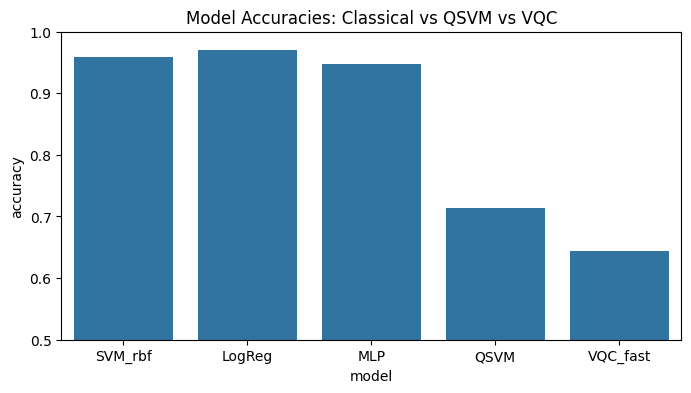

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

paths = [
    "/content/quantum_project/qml_md/results/classical_baselines.csv",
    "/content/quantum_project/qml_md/results/qsvm_fixed_results.csv",
    "/content/quantum_project/qml_md/results/vqc_results.csv"
]

dfs = [pd.read_csv(p) for p in paths]
summary = pd.concat(dfs, ignore_index=True)
display(summary)

summary.to_csv("/content/quantum_project/qml_md/results/summary_results.csv", index=False)

plt.figure(figsize=(8,4))
sns.barplot(data=summary, x="model", y="accuracy")
plt.title("Model Accuracies: Classical vs QSVM vs VQC")
plt.ylim(0.5,1.0)
plt.show()


In [2]:
from google.colab import files
uploaded = files.upload()


Saving chest_xay_sample.jpg to chest_xay_sample.jpg


In [3]:
import os
os.listdir("/content")


['.config',
 'quantum_project',
 'chest_xay_sample.jpg',
 'wdbc.data',
 'sample_data']

In [5]:
import os, shutil

src = "/content/chest_xay_sample.jpg"   # <-- REAL file from your upload
dst_folder = "/content/quantum_project/qip/images"
os.makedirs(dst_folder, exist_ok=True)

dst = os.path.join(dst_folder, "uploaded_medical.jpg")
shutil.copy(src, dst)

print("Image saved to:", dst)


Image saved to: /content/quantum_project/qip/images/uploaded_medical.jpg


In [6]:
os.listdir("/content/quantum_project/qip/images")


['uploaded_medical.jpg']

(-0.5, 2562.5, 1147.5, -0.5)

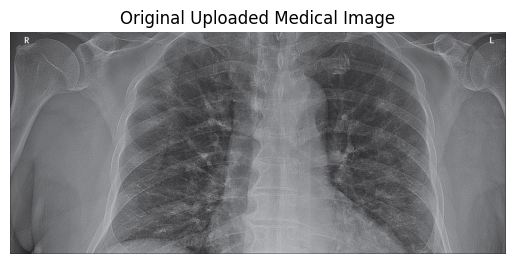

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/quantum_project/qip/images/uploaded_medical.jpg"

# Load image (using OpenCV)
img = cv2.imread(img_path)

# Convert BGR → RGB (Colab displays RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Uploaded Medical Image")
plt.axis("off")


(-0.5, 31.5, 31.5, -0.5)

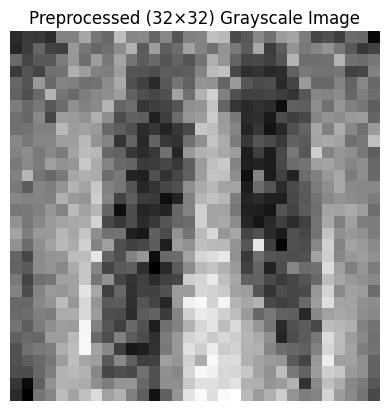

In [8]:
# Resize to 32x32
img_small = cv2.resize(img, (32, 32))

# Convert to grayscale
gray = cv2.cvtColor(img_small, cv2.COLOR_RGB2GRAY)

# Normalize pixel intensities to [0,1]
gray_norm = gray / 255.0

plt.imshow(gray_norm, cmap='gray')
plt.title("Preprocessed (32×32) Grayscale Image")
plt.axis("off")


In [9]:
import numpy as np

# Flatten the normalized grayscale image (32x32 = 1024 pixels)
pixels = gray_norm.flatten()

# Convert pixel intensities to FRQI angles
theta = 2 * np.pi * pixels

print("FRQI angle vector size:", theta.shape)


FRQI angle vector size: (1024,)


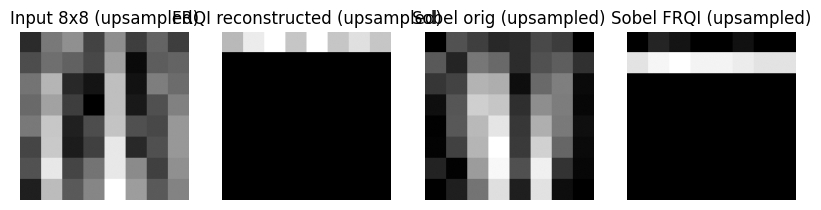

Saved images to: /content/quantum_project/qip/results
Available variables: state, arr8, recons, sobel_orig, sobel_recon


In [12]:
# Use the `state` vector we already constructed to reconstruct images and save results.
import numpy as np, os
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# `state` should already exist (we created it before initialize).
# If state is not in memory, re-run the FRQI initialization cell up to the state construction.
try:
    state  # check variable exists
except NameError:
    raise RuntimeError("Variable `state` not found. Re-run the FRQI initialization cell to recreate it.")

# parameters used earlier
N = 8                 # FRQI grid size
n_qubits = 4
# Reconstruct intensity per pixel from the `state` (color bit is LSB; pos = basis_idx >> 1)
recons = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        pos_idx = i * N + j
        p1 = 0.0
        for basis_idx, amp in enumerate(state):
            color = basis_idx & 1
            pos = basis_idx >> 1
            if pos == pos_idx and color == 1:
                p1 += (np.abs(amp)**2)
        theta_est = 2 * np.arcsin(np.sqrt(np.clip(p1, 0, 1)))
        intensity = theta_est / np.pi
        recons[i, j] = intensity

# Ensure values are in [0,1]
recons = np.clip(recons, 0.0, 1.0)

# Prepare directories
out_dir = "/content/quantum_project/qip/results"
os.makedirs(out_dir, exist_ok=True)

# Save arrays as PNGs (scale to 0..255)
in8 = (arr8 * 255).astype('uint8')      # original 8x8 input we used
recons_img = (recons * 255).astype('uint8')

# Upscale for display & saving (nearest or bilinear)
disp_scale = 32  # scale 8x8 -> 256x256 for readable images
in8_big = cv2.resize(in8, (N*disp_scale, N*disp_scale), interpolation=cv2.INTER_NEAREST)
recons_big = cv2.resize(recons_img, (N*disp_scale, N*disp_scale), interpolation=cv2.INTER_NEAREST)

# Classical Sobel on original & reconstructed
sobel_orig = cv2.Sobel(in8, cv2.CV_64F,1,0,ksize=3)**2 + cv2.Sobel(in8, cv2.CV_64F,0,1,ksize=3)**2
sobel_orig = (np.sqrt(sobel_orig) / np.max(np.sqrt(sobel_orig)) * 255).astype('uint8')
sobel_recon = cv2.Sobel(recons_img, cv2.CV_64F,1,0,ksize=3)**2 + cv2.Sobel(recons_img, cv2.CV_64F,0,1,ksize=3)**2
sobel_recon = (np.sqrt(sobel_recon) / np.max(np.sqrt(sobel_recon)) * 255).astype('uint8')

sobel_orig_big = cv2.resize(sobel_orig, (N*disp_scale, N*disp_scale), interpolation=cv2.INTER_NEAREST)
sobel_recon_big = cv2.resize(sobel_recon, (N*disp_scale, N*disp_scale), interpolation=cv2.INTER_NEAREST)

# Display results
plt.figure(figsize=(10,3))
plt.subplot(1,4,1); plt.imshow(in8_big, cmap='gray'); plt.title("Input 8x8 (upsampled)"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(recons_big, cmap='gray'); plt.title("FRQI reconstructed (upsampled)"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(sobel_orig_big, cmap='gray'); plt.title("Sobel orig (upsampled)"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(sobel_recon_big, cmap='gray'); plt.title("Sobel FRQI (upsampled)"); plt.axis('off')
plt.show()

# Save files
in8_path = os.path.join(out_dir, "input_8x8_upsampled.png")
recons_path = os.path.join(out_dir, "frqi_reconstructed_8x8_upsampled.png")
sobel_orig_path = os.path.join(out_dir, "sobel_original_8x8_upsampled.png")
sobel_recon_path = os.path.join(out_dir, "sobel_frqi_8x8_upsampled.png")

Image.fromarray(in8_big).save(in8_path)
Image.fromarray(recons_big).save(recons_path)
Image.fromarray(sobel_orig_big).save(sobel_orig_path)
Image.fromarray(sobel_recon_big).save(sobel_recon_path)

print("Saved images to:", out_dir)
print("Available variables: state, arr8, recons, sobel_orig, sobel_recon")


In [14]:
# Compare arr8 (8x8) with recons (8x8)
import numpy as np
from skimage.metrics import structural_similarity as ssim
import pandas as pd
import os

# arr8 should be the original 8x8 (grayscale, values 0..1)
# recons should be the FRQI reconstructed 8x8 (grayscale, values 0..1)
# If variables missing, you can recreate arr8 by downsampling gray_norm.

try:
    arr8  # check
except NameError:
    # recreate arr8 from your 32x32 gray_norm if needed
    import cv2
    arr8 = cv2.resize((gray_norm*255).astype('uint8'), (8,8), interpolation=cv2.INTER_LINEAR).astype(float)/255.0

# ensure shapes
arr8 = np.asarray(arr8)
recons = np.asarray(recons)

print("arr8 shape:", arr8.shape, "recons shape:", recons.shape)

# compute MSE
mse_val = np.mean((arr8 - recons)**2)

# compute SSIM: inputs must be in range [0,1] or [0,255], grayscale
ssim_val = ssim(arr8, recons, data_range=1.0)

print(f"MSE (8x8): {mse_val:.6f}")
print(f"SSIM (8x8): {ssim_val:.6f}")

# save numeric results
out_dir = "/content/quantum_project/qip/results"
os.makedirs(out_dir, exist_ok=True)
pd.DataFrame([{"metric":"MSE","value":float(mse_val)}, {"metric":"SSIM","value":float(ssim_val)}]).to_csv(
    os.path.join(out_dir, "frqi_reconstruction_metrics_8x8.csv"), index=False)
print("Saved metrics to:", os.path.join(out_dir, "frqi_reconstruction_metrics_8x8.csv"))


arr8 shape: (8, 8) recons shape: (8, 8)
MSE (8x8): 0.187092
SSIM (8x8): 0.002689
Saved metrics to: /content/quantum_project/qip/results/frqi_reconstruction_metrics_8x8.csv


In [15]:
# === Step 1: prepare project folder in Colab (run this cell) ===
import os, shutil, zipfile

ROOT = "/content/quantum_medical_project"
os.makedirs(ROOT, exist_ok=True)

# create folders
folders = [
    "qml_md/src","qml_md/notebooks","qml_md/data","qml_md/results",
    "qip/images","qip/notebooks","qip/results",
    "docs","docs/figures"
]
for f in folders:
    os.makedirs(os.path.join(ROOT,f), exist_ok=True)

# copy the detailed report from session path into docs/
src_report = "/mnt/data/Detailed_QML_QIP_Report.pdf"
dst_report = os.path.join(ROOT, "docs", "Detailed_QML_QIP_Report.pdf")
if os.path.exists(src_report):
    shutil.copy(src_report, dst_report)
    print("Copied report to:", dst_report)
else:
    print("Report not found at", src_report, "- please re-run report generation or upload the file and retry.")

# create basic files
open(os.path.join(ROOT,"README.md"), "w").write("# Quantum Medical Project\n\nSee `docs/Detailed_QML_QIP_Report.pdf` for the full report.\n")
open(os.path.join(ROOT,"requirements.txt"), "w").write("numpy\npandas\nscikit-learn\nmatplotlib\nqiskit\nqiskit-aer\nopencv-python-headless\nscikit-image\n")
open(os.path.join(ROOT,".gitignore"), "w").write("__pycache__/\n.ipynb_checkpoints/\n*.pkl\n*.npz\n/content/\n/mnt/data/\n")

# list top-level to confirm
print("\nProject prepared at:", ROOT)
print("Top-level files and folders:")
print(sorted(os.listdir(ROOT)))

# create a zip (so you can download it)
zip_path = "/content/quantum_medical_project.zip"
print("\nCreating zip:", zip_path)
shutil.make_archive("/content/quantum_medical_project", 'zip', ROOT)
print("Zip ready. In the Colab left Files pane, find /content/quantum_medical_project.zip and download it to your machine.")


Report not found at /mnt/data/Detailed_QML_QIP_Report.pdf - please re-run report generation or upload the file and retry.

Project prepared at: /content/quantum_medical_project
Top-level files and folders:
['.gitignore', 'README.md', 'docs', 'qip', 'qml_md', 'requirements.txt']

Creating zip: /content/quantum_medical_project.zip
Zip ready. In the Colab left Files pane, find /content/quantum_medical_project.zip and download it to your machine.
